In [ ]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


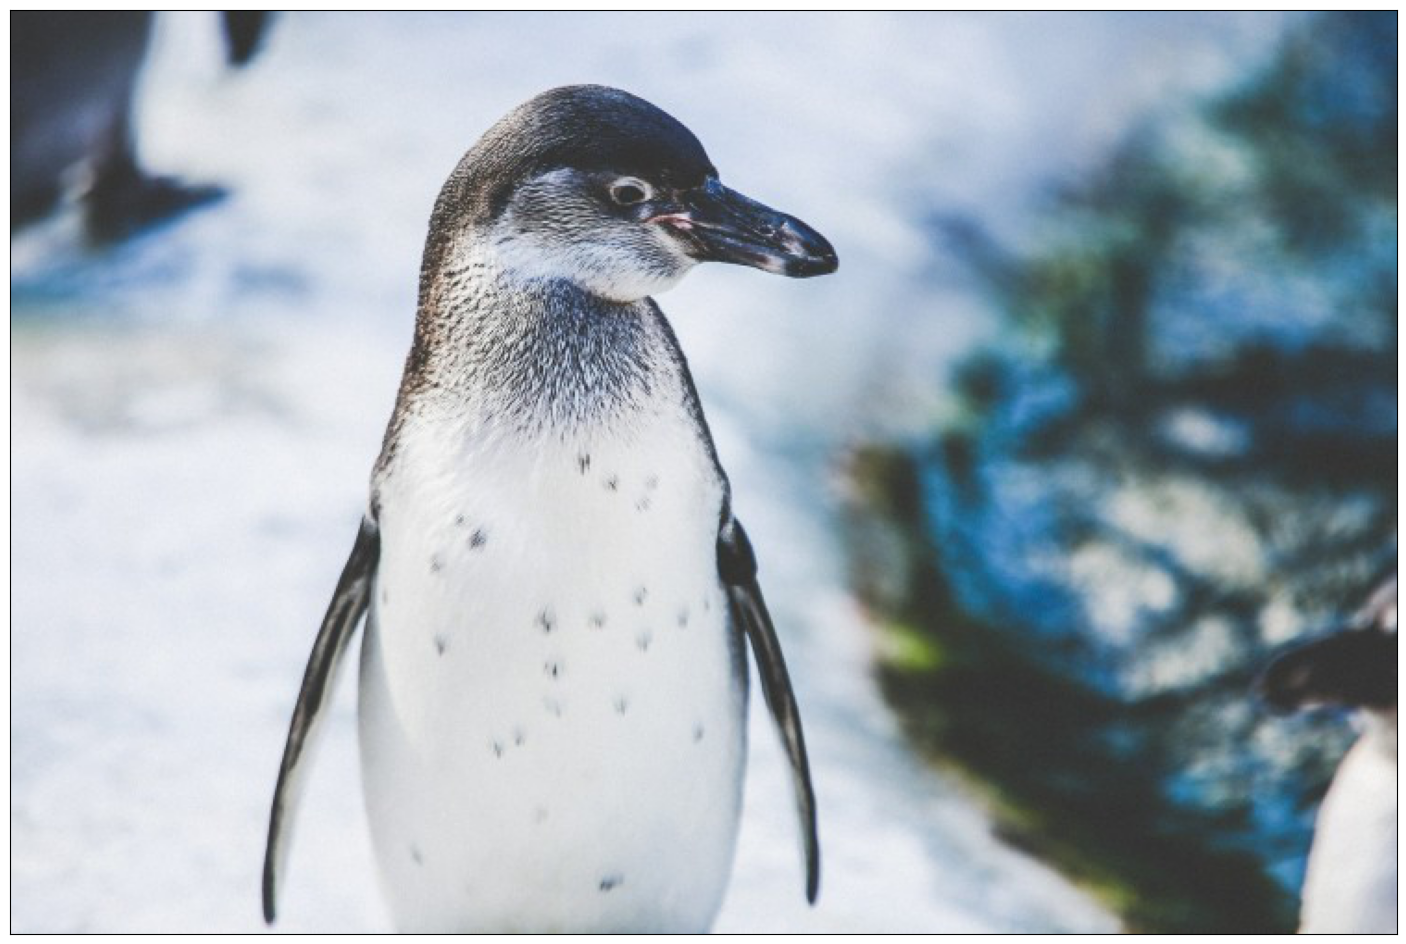

In [ ]:
plt.rcParams['figure.figsize'] = (20, 12)
image = io.imread('penguin.jpeg')
labels = plt.axes(xticks=[], yticks=[])
labels.imshow(image);


In [ ]:
rows = image.shape[0]
cols = image.shape[1]

image1 = image.reshape(rows*cols, -1)
kmeans = KMeans(n_clusters=20)
kmeans.fit(image1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=20)

In [ ]:
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)
compressed_image = compressed_image.reshape(rows, cols, 3)

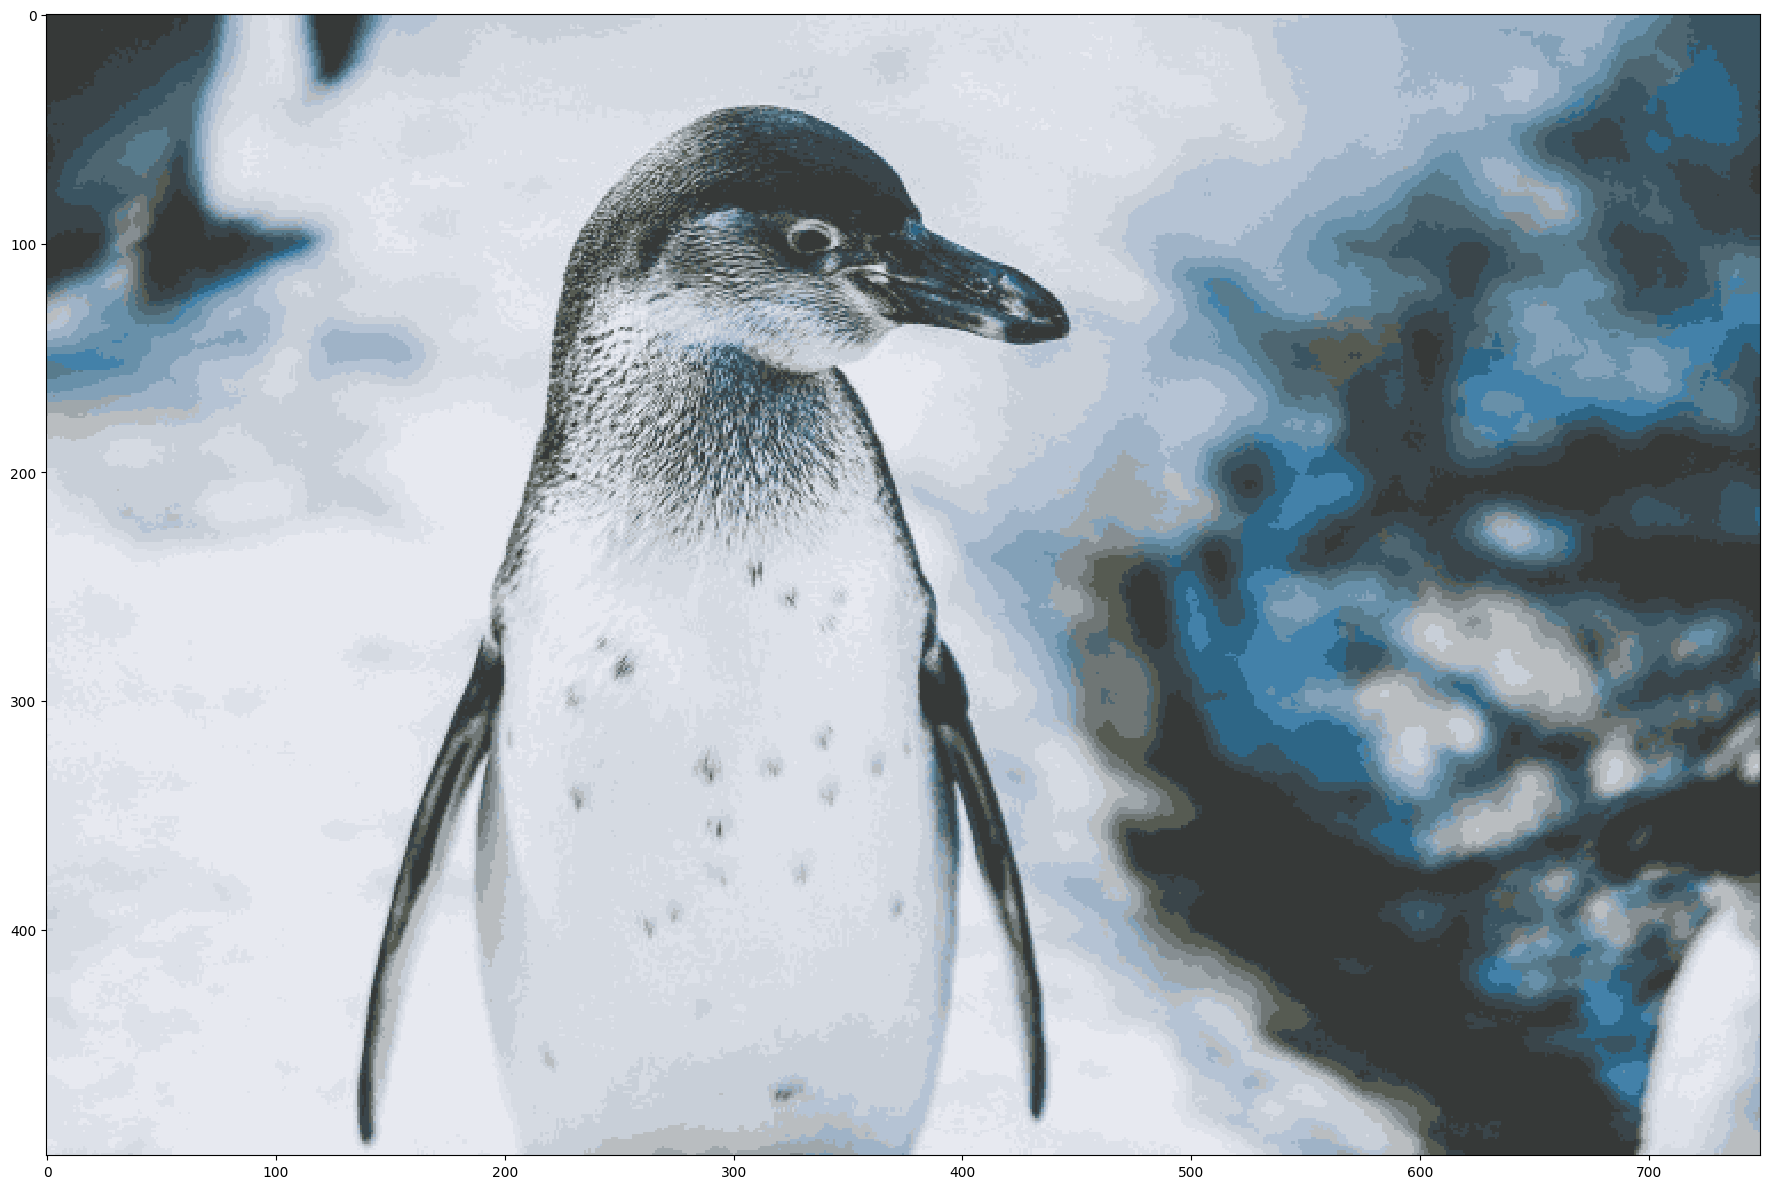

In [ ]:
io.imsave('compressed_image_64.png', compressed_image)
io.imshow(compressed_image)
io.show()

In [ ]:
import os

def get_file_size(file_path):
    """Returns the size of a file in bytes."""
    return os.path.getsize(file_path)

original_image_path = "penguin.jpeg"
compressed_image_path = "newpengu.png"

original_size = get_file_size(original_image_path)
compressed_size = get_file_size(compressed_image_path)

compression_ratio = compressed_size / original_size

print(f"Original Size: {original_size} bytes")
print(f"Compressed Size: {compressed_size} bytes")
print(f"Compression Ratio: {compression_ratio:.2f}")


Original Size: 67586 bytes
Compressed Size: 62975 bytes
Compression Ratio: 0.93


In [ ]:
import cv2
import os
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# Assuming you have the original image file path and the compressed image file path
original_image_path = "penguin.jpeg"
compressed_image_path = "newpengu.png"

# Load the images
original_image = cv2.imread(original_image_path)
compressed_image = cv2.imread(compressed_image_path)

# Resize the compressed image to match the dimensions of the original image
compressed_image_resized = cv2.resize(compressed_image, (original_image.shape[1], original_image.shape[0]))

# Convert images to grayscale if necessary
original_image_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
compressed_image_gray = cv2.cvtColor(compressed_image_resized, cv2.COLOR_BGR2GRAY)

# Calculate PSNR
psnr = peak_signal_noise_ratio(original_image_gray, compressed_image_gray)

# Calculate SSIM
ssim = structural_similarity(original_image_gray, compressed_image_gray)

# Calculate MSE
mse = ((original_image_gray - compressed_image_gray) ** 2).mean()

# Calculate Bitrate
original_file_size = os.path.getsize(original_image_path) * 8  # in bits
compressed_file_size = os.path.getsize(compressed_image_path) * 8  # in bits
bitrate = compressed_file_size / original_file_size

# Print the evaluation metrics
print(f"PSNR: {psnr:.2f} dB")
print(f"SSIM: {ssim:.4f}")
print(f"MSE: {mse:.2f}")
print(f"Bitrate: {bitrate:.2f} bits/pixel")


PSNR: 15.47 dB
SSIM: 0.6031
MSE: 84.48
Bitrate: 0.93 bits/pixel
